In [1]:
%matplotlib inline

/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
def flow_dir(lat_pre, lon_pre, lat_post, lon_post, delta):
    '''
    This function takes in the latitudes and longitude for current grid
    cell and next grid cell and outputs the flow direction defined based
    on VIC website. 
    '''
    if abs(lat_pre - lat_post) != 0 and abs(lat_pre - lat_post) != delta:
        print('those two grid cells are not close to each other!!!')
#        break
    
    if abs(lon_pre - lon_post) != 0 and abs(lon_pre - lon_post) != delta:
        print('those two grid cells are not close to each other!!!')
#        break
    
    if lat_pre - lat_post == delta:
        if lon_pre - lon_post == delta:
            flow_dir = 6
        if lon_pre - lon_post == -delta:
            flow_dir = 4
        if lon_pre - lon_post == 0:
            flow_dir = 5
    else:
        if lat_pre - lat_post == 0:
            if lon_pre - lon_post == delta:
                flow_dir = 7
            if lon_pre - lon_post == -delta:
                flow_dir = 3
        else:
            if lon_pre - lon_post == delta:
                flow_dir = 8
            if lon_pre - lon_post == -delta:
                flow_dir = 2
            if lon_pre - lon_post == 0:
                flow_dir = 1
    
    return flow_dir

In [4]:
def flow_dir_ind(grid_pre, grid_post):
    '''
    This function takes in the latitudes and longitude for current grid
    cell and next grid cell and outputs the flow direction defined based
    on VIC website. 
    '''
    
    if grid_pre - grid_post == -1:
        flow_dir = 3
    if grid_pre - grid_post == 1:
        flow_dir = 7
    if grid_pre - grid_post == 463:
        flow_dir = 4
    if grid_pre - grid_post == -463:
        flow_dir = 8
    if grid_pre - grid_post == 465:
        flow_dir = 6
    if grid_pre - grid_post == -465:
        flow_dir = 2
    if grid_pre - grid_post == 464:
        flow_dir = 5
    if grid_pre - grid_post == -464:
        flow_dir = 1
        
    return flow_dir
    

In [5]:
#pnnl_domain = xr.open_dataset('domain_Tenn_PNNL.nc')
uw_domain = xr.open_dataset('/raid3/yifan/RIPS/UW_domain_Tenn.nc')

TypeError: Error: /raid3/yifan/RIPS/UW_domain_Tenn.nc is not a valid NetCDF 3 file

In [6]:
pnnl_rnet = pd.read_csv('/civil/hydro/yifan/MOSART/6/MOSART_WM_input/6.rnet', sep=' ', skiprows=[0,1], header=None)

In [7]:
uw_rnet = pd.read_csv('/civil/hydro/yifan/MOSART/6/analysis/Tennessee.fdir', sep=' '
                      , skiprows=[0,1,2,3,4,5], header=None).dropna(axis=1)

In [8]:
pnnl_region = pd.read_csv('/civil/hydro/yifan/MOSART/6/MOSART_WM_input/6_mask_plot.ll',sep=' ',header=None, index_col=[0])

In [9]:
pnnl_lon = pnnl_region[2] - 360.
pnnl_lat = pnnl_region[1]

In [10]:
flow_direction = []
for f in range(len(pnnl_lat)):
    flow_direction.append(flow_dir_ind(pnnl_rnet[14][f], pnnl_rnet[15][f]))

In [11]:
np.linspace(-88.625,-88.625+59*0.125, 60) + 0.0625

array([-88.5625, -88.4375, -88.3125, -88.1875, -88.0625, -87.9375,
       -87.8125, -87.6875, -87.5625, -87.4375, -87.3125, -87.1875,
       -87.0625, -86.9375, -86.8125, -86.6875, -86.5625, -86.4375,
       -86.3125, -86.1875, -86.0625, -85.9375, -85.8125, -85.6875,
       -85.5625, -85.4375, -85.3125, -85.1875, -85.0625, -84.9375,
       -84.8125, -84.6875, -84.5625, -84.4375, -84.3125, -84.1875,
       -84.0625, -83.9375, -83.8125, -83.6875, -83.5625, -83.4375,
       -83.3125, -83.1875, -83.0625, -82.9375, -82.8125, -82.6875,
       -82.5625, -82.4375, -82.3125, -82.1875, -82.0625, -81.9375,
       -81.8125, -81.6875, -81.5625, -81.4375, -81.3125, -81.1875])

In [12]:
np.linspace(34+26*0.125, 34, 27) + 0.0625

array([ 37.3125,  37.1875,  37.0625,  36.9375,  36.8125,  36.6875,
        36.5625,  36.4375,  36.3125,  36.1875,  36.0625,  35.9375,
        35.8125,  35.6875,  35.5625,  35.4375,  35.3125,  35.1875,
        35.0625,  34.9375,  34.8125,  34.6875,  34.5625,  34.4375,
        34.3125,  34.1875,  34.0625])

In [13]:
flow_dir_UW = xr.DataArray(uw_rnet.as_matrix(), coords=[np.linspace(34+26*0.125, 34, 27) + 0.0625, np.linspace(-88.625,-88.625+59*0.125, 60) + 0.0625], dims=['lat', 'lon'])

# flow direction file

In [14]:
# transfer the ascii file into a domain file containing latitude and longitude
lat_all = np.linspace(34, 34+26*0.125, 27) + 0.0625
lon_all = np.linspace(-88.625,-88.625+59*0.125, 60) + 0.0625

In [15]:
dir_pnnl = np.full([len(lat_all), len(lon_all)],np.NaN)

for j in range(len(pnnl_lat)):
    lat_index_temp = np.where(lat_all == pnnl_lat.values[j])[0][0]
    lon_index_temp = np.where(lon_all == pnnl_lon.values[j])[0][0]
    dir_pnnl[lat_index_temp, lon_index_temp] = flow_direction[j]

In [16]:
flow_dir_pnnl = xr.DataArray(dir_pnnl[:,:], coords=[lat_all,lon_all], dims=['lat', 'lon'])

/civil/hydro/yifan/anaconda/py3/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive


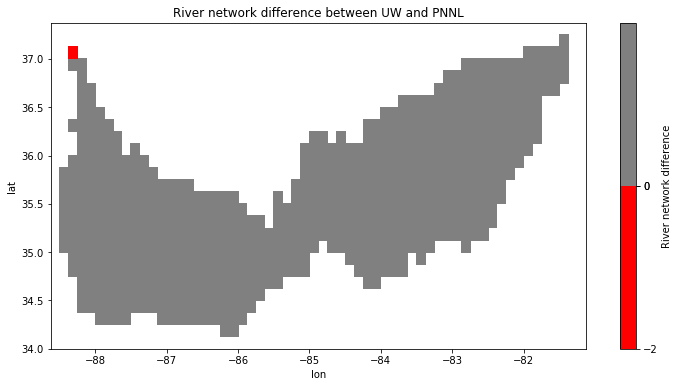

In [39]:
plt.figure(figsize=[12,6])
River_network_difference = (flow_dir_pnnl.where(flow_dir_UW>0) - flow_dir_UW.where(flow_dir_pnnl>0))
River_network_difference = River_network_difference.to_dataset(name='River network difference')
River_network_difference['River network difference'].plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
plt.title('River network difference between UW and PNNL')

plt.savefig('MOSART_plot/flow_direc_difference.png', dpi=300, bbox_inches='tight')

In [36]:
from matplotlib import colors

cmap = colors.ListedColormap(['red', 'gray', 'red'])
bounds=[-2,0,0]
norm = colors.BoundaryNorm(bounds, cmap.N)



# The difference between reservoirs

In [48]:
res_uw = pd.read_csv('reservoir_to_model_Yixin.csv')

In [49]:
res_pnnl = pd.read_csv('/civil/hydro/yifan/MOSART/6/MOSART_WM_input/6_reservoir.txt', sep='\t')

In [36]:
res_uw_total = pd.read_fwf('/civil/hydro/yifan/MOSART/6/analysis/Tennessee_8th_Network_2'
                           ,widths=[4,6,4,6,8,6,4,10,4,12,8,8,6,6,6], header=None, skiprows=[0,1,2,3,4,5,6,7,8]).dropna()

In [50]:
lat_res_pnnl = []
lon_res_pnnl = []

for i in res_pnnl.index.values:
    lat_temp = pnnl_region.loc[res_pnnl['Subbasin'].iloc[i]][1]
    lon_temp = pnnl_region.loc[res_pnnl['Subbasin'].iloc[i]][2] - 360.
    
    lat_res_pnnl.append(lat_temp)
    lon_res_pnnl.append(lon_temp)

In [46]:
lat_uw_tot = []
lon_uw_tot = []
uw_res_ind = []

for f in res_uw_total.index.values:
    if str(res_uw_total[14][f]) == 'True':
        lat_uw_tot.append(float(res_uw_total[7][f]))
        lon_uw_tot.append(float(res_uw_total[9][f]))
        uw_res_ind.append(int(res_uw_total[13][f]))

In [135]:
##This is used to plot for river network
index_seg_end = []
index_seg_start = []

for f in range(len(res_uw_total.index)):
    if res_uw_total[11][res_uw_total.index[f]] == 0.0:
        index_seg_end.append(f)
        index_seg_start.append(f+1)
index_seg_start = [0] + index_seg_start[0:-1]
    

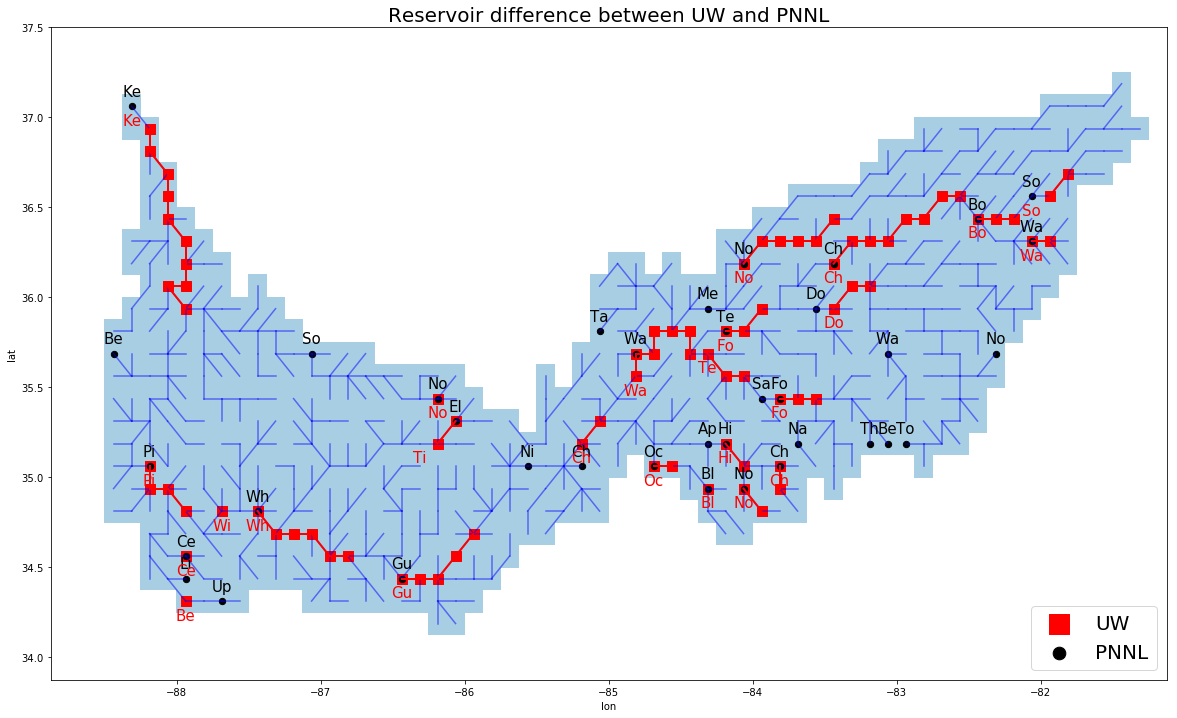

In [173]:
plt.figure(figsize=[20,12])
uw_domain['domain'].plot.pcolormesh('lon', 'lat', cmap='Blues',vmin=-9, vmax=20, add_colorbar=False)
#plt.scatter(res_uw['grid_lon'].values, res_uw['grid_lat'].values, s=80, c='b', marker='s')
plt.scatter(lon_uw_tot, lat_uw_tot, s=100, c='r', marker='s')

plt.scatter(lon_res_pnnl, lat_res_pnnl, c='k', s=40, marker='o')

plt.legend(['UW','PNNL'], loc=4, fontsize=20, markerscale=2)

#plot reservoir network
for f in range(len(index_seg_end)):
    for i in np.arange(index_seg_start[f], index_seg_end[f]):
        plt.plot([res_uw_total[9][res_uw_total.index[i]], res_uw_total[9][res_uw_total.index[i+1]]],
                [res_uw_total[7][res_uw_total.index[i]], res_uw_total[7][res_uw_total.index[i+1]]], 'b-', alpha=0.5)

    #connect the reservoir grid cells
for i in np.unique(uw_res_ind):
    index = np.where(uw_res_ind==i)
#    print(np.shape(index))
    if np.shape(index)[1] >1:
#        print(np.shape(index)[1])
        for f in range(np.shape(index)[1] -1):
#            print(f)
            plt.plot([lon_uw_tot[index[0][f]],lon_uw_tot[index[0][f+1]]]
                     , [lat_uw_tot[index[0][f]],lat_uw_tot[index[0][f+1]]], 'r', lw=2)

plt.title('Reservoir difference between UW and PNNL', fontsize=20)

for f in res_pnnl.index.values:
    plt.text(lon_res_pnnl[f], lat_res_pnnl[f] + 0.08, res_pnnl['DAM_NAME'].values[f][0:2]
             , {'ha': 'center', 'va': 'center'},rotation=0, fontsize=15)

for j in res_uw.index.values:
    plt.text(res_uw['grid_lon'].values[j], res_uw['grid_lat'].values[j] - 0.08, res_uw['dam_name'].values[j][0:2], 
            {'ha': 'center', 'va': 'center'},rotation=0, color='r', fontsize=15)
    
#plt.savefig('Reservoir_difference_between_UW_PNNL.png', dpi=300, bbox_inches='tight')

In [179]:
pnnl_region.loc[37439][1]

35.0625

In [182]:
res_uw

,dam_number,dam_name,dam_lat,dam_lon,grid_lat,grid_lon,year_operated_start_of_Calendar_year,top_vol_acre_feet,bot_vol_acre_feet,max_flow_cfs,min_flow_cfs,depth_feet,width_feet
0,1,Watauga,36.3233,-82.1219,36.3125,-82.0625,1949,677000,0,NaN,107,105.1,3260
1,2,South Holston,36.5233,-82.0889,36.5625,-82.0625,1951,764000,0,NaN,90,100.5,2646
2,3,Boone,36.4400,-82.4378,36.4375,-82.4375,1953,193400,0,NaN,400,46.8,1042
3,5,Cherokee,36.1661,-83.4983,36.1875,-83.4375,1942,1541000,0,NaN,325,52.1,39118
4,7,Douglas,35.9611,-83.5389,35.9375,-83.4375,1943,1461000,0,NaN,585,52.0,5373
5,8,Fort Loudoun,35.7909,-84.2427,35.8125,-84.1875,1943,393000,0,NaN,710,28.1,1900
6,11,Fontana,35.4522,-83.8047,35.4375,-83.8125,1945,1443000,0,NaN,790,140.2,2927
7,16,Tellico,35.7778,-84.2597,35.6875,-84.3125,1980,424000,0,NaN,1000,27.2,3877
8,17,Norris,36.2242,-84.0914,36.1875,-84.0625,1936,2552000,0,NaN,200,75.1,2174
9,18,Watts Bar,35.6213,-84.7816,35.5625,-84.8125,1942,1175000,0,NaN,1200,31.3,3240
